# Sesión 2- Pandas

## Contenido 

1. [Unir datos](#unir)
2. [Visualización de datos](#vis)
3. [Series de tiempo](#time)
4. [Eliminando datos](#del)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. Unir datos 

Pandas proporciona varias funciones para combinar fácilmente Series o DataFrames con varios tipos de conjuntos lógicos.

In [51]:
info_1 = {
        'identificacion': ['1', '2', '3', '4', '5'],
        'primer_nombre': ['Eliana', 'Juan', 'Leonardo', 'Juan', 'Daniela'], 
        'apellido': ['Bonalde', 'Olmos', 'Lopez', 'Basto', 'Jaimes']}

info_2 = {
        'identificacion': ['4', '5', '6', '4', '8'],
        'primer_nombre': ['Maria', 'Brayan', 'Bran', 'Juan', 'Betty'], 
        'apellido': ['Ortega', 'Bermudez', 'Gutierrez', 'Barajas', 'González']}

info_3 = {
        'identificacion': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'nota': [51, 15, 25, 71, 16, 14, 15, 1, 61, 68]}

In [53]:
# Crear los 3 DataFrames con la información anterior
datos1 = pd.DataFrame(info_1)
datos2 = pd.DataFrame(info_2)
datos3 = pd.DataFrame(info_3)
datos3

,identificacion,nota
0,1,51
1,2,15
2,3,25
3,4,71
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,68


Un atajo útil para concat() son los métodos de instancia append() en Series y DataFrame.
Estos métodos en realidad son anteriores a concat(). Concatenan a lo largo del eje = 0.

In [9]:
# Unir los datos1 y datos2 por medio de append()
union =datos1.append(datos2)
union


,identificacion,primer_nombre,apellido
0,1,Eliana,Bonalde
1,2,Juan,Olmos
2,3,Leonardo,Lopez
3,4,Juan,Basto
4,5,Daniela,Jaimes
0,4,Maria,Ortega
1,5,Brayan,Bermudez
2,6,Bran,Gutierrez
3,7,Juan,Barajas
4,8,Betty,González


La función concat() hace todo el trabajo pesado de realizar operaciones de concatenación a lo largo de un eje mientras realiza una lógica de conjunto opcional (unión o intersección) de los índices (si los hay) en los otros ejes. 

In [11]:
personas = pd.concat([datos1, datos2])
personas

,identificacion,primer_nombre,apellido
0,1,Eliana,Bonalde
1,2,Juan,Olmos
2,3,Leonardo,Lopez
3,4,Juan,Basto
4,5,Daniela,Jaimes
0,4,Maria,Ortega
1,5,Brayan,Bermudez
2,6,Bran,Gutierrez
3,7,Juan,Barajas
4,8,Betty,González


In [13]:
personas_int = pd.concat([datos1, datos2], ignore_index=True)
personas_int

,identificacion,primer_nombre,apellido
0,1,Eliana,Bonalde
1,2,Juan,Olmos
2,3,Leonardo,Lopez
3,4,Juan,Basto
4,5,Daniela,Jaimes
5,4,Maria,Ortega
6,5,Brayan,Bermudez
7,6,Bran,Gutierrez
8,7,Juan,Barajas
9,8,Betty,González


In [31]:
personas_col = pd.concat([datos1, datos2, datos3], axis = 'columns')
print(datos1)
print(datos2)
print(datos3)

personas_col

  identificacion primer_nombre apellido
0              1        Eliana  Bonalde
1              2          Juan    Olmos
2              3      Leonardo    Lopez
3              4          Juan    Basto
4              5       Daniela   Jaimes
  identificacion primer_nombre   apellido
0              4         Maria     Ortega
1              5        Brayan   Bermudez
2              6          Bran  Gutierrez
3              7          Juan    Barajas
4              8         Betty   González
  identificacion  nota
0              1    51
1              2    15
2              3    25
3              4    71
4              5    16
5              7    14
6              8    15
7              9     1
8             10    61
9             11    68


,identificacion,primer_nombre,apellido,identificacion,primer_nombre,apellido,identificacion,nota
0,1,Eliana,Bonalde,4,Maria,Ortega,1,51
1,2,Juan,Olmos,5,Brayan,Bermudez,2,15
2,3,Leonardo,Lopez,6,Bran,Gutierrez,3,25
3,4,Juan,Basto,7,Juan,Barajas,4,71
4,5,Daniela,Jaimes,8,Betty,González,5,16
5,NaN,NaN,NaN,NaN,NaN,NaN,7,14
6,NaN,NaN,NaN,NaN,NaN,NaN,8,15
7,NaN,NaN,NaN,NaN,NaN,NaN,9,1
8,NaN,NaN,NaN,NaN,NaN,NaN,10,61
9,NaN,NaN,NaN,NaN,NaN,NaN,11,68


In [38]:
personas_keys = pd.concat([datos1, datos2], axis = 0, keys =["Salón_1", "Salón_2"])
personas_keys

identificacion primer_nombre   apellido
Salón_1 0              1        Eliana    Bonalde
        1              2          Juan      Olmos
        2              3      Leonardo      Lopez
        3              4          Juan      Basto
        4              5       Daniela     Jaimes
Salón_2 0              4         Maria     Ortega
        1              5        Brayan   Bermudez
        2              6          Bran  Gutierrez
        3              7          Juan    Barajas
        4              8         Betty   González

In [39]:
personas_keys.loc["Salón_1",2]


identificacion           3
primer_nombre     Leonardo
apellido             Lopez
Name: (Salón_1, 2), dtype: object

pandas proporciona la función merge(), como punto de entrada para todas las operaciones de unión de bases de datos estándar entre DataFrames:

In [46]:
type(personas_keys.loc["Salón_1"].apellido)


pandas.core.series.Series

In [55]:
pd.merge(datos2, datos1, on=['primer_nombre', 'identificacion'], how='outer')


,identificacion,primer_nombre,apellido_x,apellido_y
0,4,Maria,Ortega,NaN
1,5,Brayan,Bermudez,NaN
2,6,Bran,Gutierrez,NaN
3,4,Juan,Barajas,Basto
4,8,Betty,González,NaN
5,1,Eliana,NaN,Bonalde
6,2,Juan,NaN,Olmos
7,3,Leonardo,NaN,Lopez
8,5,Daniela,NaN,Jaimes


In [34]:
datos4 = pd.merge(datos1, datos2, on='identificacion', how='outer')
pd.merge(datos4, datos3, on='identificacion', how='outer')

,identificacion,primer_nombre_x,apellido_x,primer_nombre_y,apellido_y,nota
0,1,Eliana,Bonalde,NaN,NaN,51.0
1,2,Juan,Olmos,NaN,NaN,15.0
2,3,Leonardo,Lopez,NaN,NaN,25.0
3,4,Juan,Basto,Maria,Ortega,71.0
4,5,Daniela,Jaimes,Brayan,Bermudez,16.0
5,6,NaN,NaN,Bran,Gutierrez,NaN
6,7,NaN,NaN,Juan,Barajas,14.0
7,8,NaN,NaN,Betty,González,15.0
8,9,NaN,NaN,NaN,NaN,1.0
9,10,NaN,NaN,NaN,NaN,61.0


In [21]:
pd.merge(datos1, datos2, on='identificacion', how='outer')

,identificacion,primer_nombre_x,apellido_x,primer_nombre_y,apellido_y
0,1,Eliana,Bonalde,NaN,NaN
1,2,Juan,Olmos,NaN,NaN
2,3,Leonardo,Lopez,NaN,NaN
3,4,Juan,Basto,Maria,Ortega
4,5,Daniela,Jaimes,Brayan,Bermudez
5,6,NaN,NaN,Bran,Gutierrez
6,7,NaN,NaN,Juan,Barajas
7,8,NaN,NaN,Betty,González


In [ ]:
# Unir los datos 1 y los datos 2, en el valor "primer_nombre"


## 2. Visualización de datos

In [56]:
titanic = pd.read_csv('Data/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [58]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:ylabel='Embarked'>

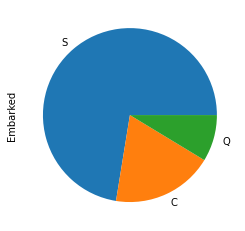

In [61]:
titanic.Embarked.value_counts().plot(kind='pie')

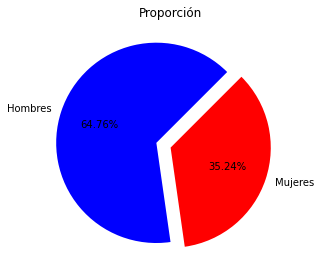

In [64]:
masculino = (titanic['Sex'] == 'male').sum()
femenino = (titanic['Sex'] == 'female').sum()

proporcion = [masculino, femenino]

plt.pie(
    proporcion,
    
    labels = ['Hombres', 'Mujeres'],

    colors = ['blue','red'],
    
    explode = (0.15 , 0),
    
    startangle = 45,
    
    autopct = '%1.2f%%'
    )

plt.title("Proporción")

plt.tight_layout()
plt.show()

(-5.0, 85.0)

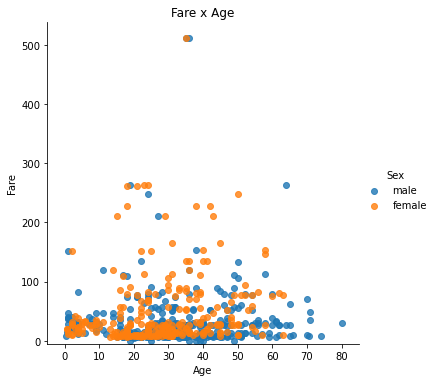

In [65]:
lm = sns.lmplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex', fit_reg=False)

lm.set(title = 'Fare x Age')

axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)



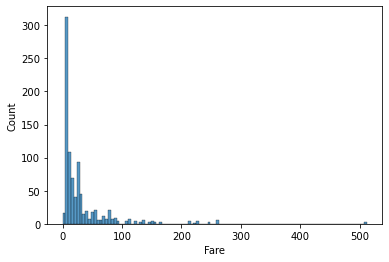

In [67]:
sns.histplot(titanic.Fare);

<AxesSubplot:xlabel='Survived'>

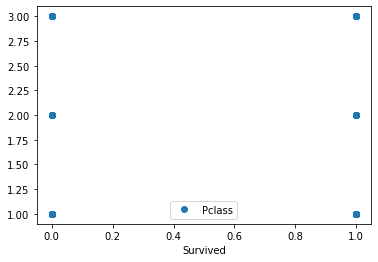

In [70]:
titanic.plot(x='Survived', y='Pclass', style='o')


In [ ]:
titanic.Survived.sum()

## 3. Series temporales 

Una serie de tiempo es una serie de puntos de datos indexados (o listados o graficados) en orden de tiempo. Más comúnmente, una serie de tiempo es una secuencia tomada en puntos sucesivos igualmente espaciados en el tiempo. Es un método de conveniencia para conversión de frecuencia y remuestreo de series de tiempo. El objeto debe tener un índice similar a una fecha y hora.

pandas contiene amplias capacidades y características para trabajar con datos de series de tiempo para todos los dominios. Utilizando los tipos de dtypes datetime64 y timedelta64 de NumPy.

In [ ]:
apple = pd.read_csv('Data/appl_1980_2014.csv')
apple

In [ ]:
apple.dtypes

In [ ]:
apple.Date = pd.to_datetime(apple.Date)

apple['Date'].head()

In [ ]:
apple = apple.set_index('Date')

apple.head()

In [ ]:
# Revisar si hay fechas duplicadas


In [ ]:
apple.sort_index(ascending = True).head()

El remuestreo genera una distribución de muestreo única sobre la base de los datos reales. Podemos aplicar varias frecuencias para volver a muestrear nuestros datos de series de tiempo. 
Las frecuencias de series de tiempo más comúnmente utilizadas son: 
* W: frecuencia semanal
* M: frecuencia de fin de mes
* SM: frecuencia de fin de mes semestral 
* Q: frecuencia de un cuarto de final

In [ ]:
# Se obtiene el último día hábil de cada mes
apple.month = apple.resample('M').last()
apple.month.head()

In [ ]:
(apple.index.max() - apple.index.min()).days

In [ ]:
# ¿Cuántos meses tienen los datos?


In [ ]:
appl_open = apple['Adj Close'].plot(title = "Apple Stock")

fig = appl_open.get_figure()
fig.set_size_inches(13.5, 9)

## 4. Eliminando datos

In [ ]:
wine =  pd.read_csv('Data/wine.data')
wine.head()

drop() elimina las etiquetas especificadas de filas o columnas.

Elimina filas o columnas especificando los nombres de las etiquetas y el eje correspondiente, o especificando directamente el índice o los nombres de las columnas. 

In [ ]:
# Eliminar la primera, cuarta, séptima, novena, undécima, decimotercera y decimocuarta columnas
wine = wine.drop(wine.columns[[0,3,6,8,11,12,13]], axis = 1)

wine.head()

In [ ]:
wine.columns = ['alcohol', 'malic_acid', 'alcalinity_of_ash', 'magnesium', 'flavanoids', 'proanthocyanins', 'hue']
wine.head()

In [ ]:
# Se establece los valores de las primeras 3 filas de alcohol como NaN
wine.iloc[0:3, 0] = np.nan
wine.head()

In [ ]:
# Establezca el valor de las filas 3 y 4 de magnesio como NaN 


In [ ]:
wine = wine.dropna(axis = 0, how = "any")
wine.head()

A veces, el archivo csv tiene valores nulos, que luego se muestran como NaN en el marco de datos. Al igual que el método pandas dropna() administra y elimina valores nulos de un marco de datos, fillna() administra y permite que el usuario reemplace los valores NaN con algún valor propio.

In [ ]:
wine.iloc[1:3, 0] = np.nan
wine.head()

In [ ]:
# Se llena el valor de NaN con el número 10 en alcohol y 100 en magnesio
wine.alcohol.fillna(10, inplace = True)

wine.magnesium.fillna(100, inplace = True)

wine.head()

[Referencias](#refe)

## Ejercicio final

En el siguiente un dataset de los flujos de fondo de los Estados Unidos:
https://raw.githubusercontent.com/datasets/investor-flow-of-funds-us/master/data/weekly.csv.

* Convierta las fechas en un DatetimeIndex
* Cambie la frecuencia a mensual, sume los valores y asígnela ese valor a cada mes
* Eliminar las filas que obtuvieron valores Nan